# BVIX Pridictor

**Date:** 6/20/2025

## Problem Statement
Predict Bitcoin price volatility over the next 3 hours

## Dataset
- **Source:** Btc_15min_data, https://www.cryptodatadownload.com/data/ 
- **Size:** 260,974
- **Domain:** Tabular

## Objectives
Find low(0)/ medium(1) / high(2) future volatility based on current data

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ML libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


# 1. Data Exploration

Let's start by exploring our dataset to understand its structure and characteristics.

*Data Preparation Summary:*


I labeled each data point based on the future 3-hour volatility into low, medium, and high classes, ensuring a balanced distribution to avoid class imbalance bias. For features, I included technical indicators such as moving averages (e.g., Hull MA, MACD) of price change, volume change (to mitigate time-related quantity bias), and rolling standard deviation. Additionally, I incorporated temporal features like month, day of the month, and hour of the day to capture potential cyclical or seasonal patterns in volatility behavior.

(Details in the .ipynbs below)

Some interesting cyclical patterns below

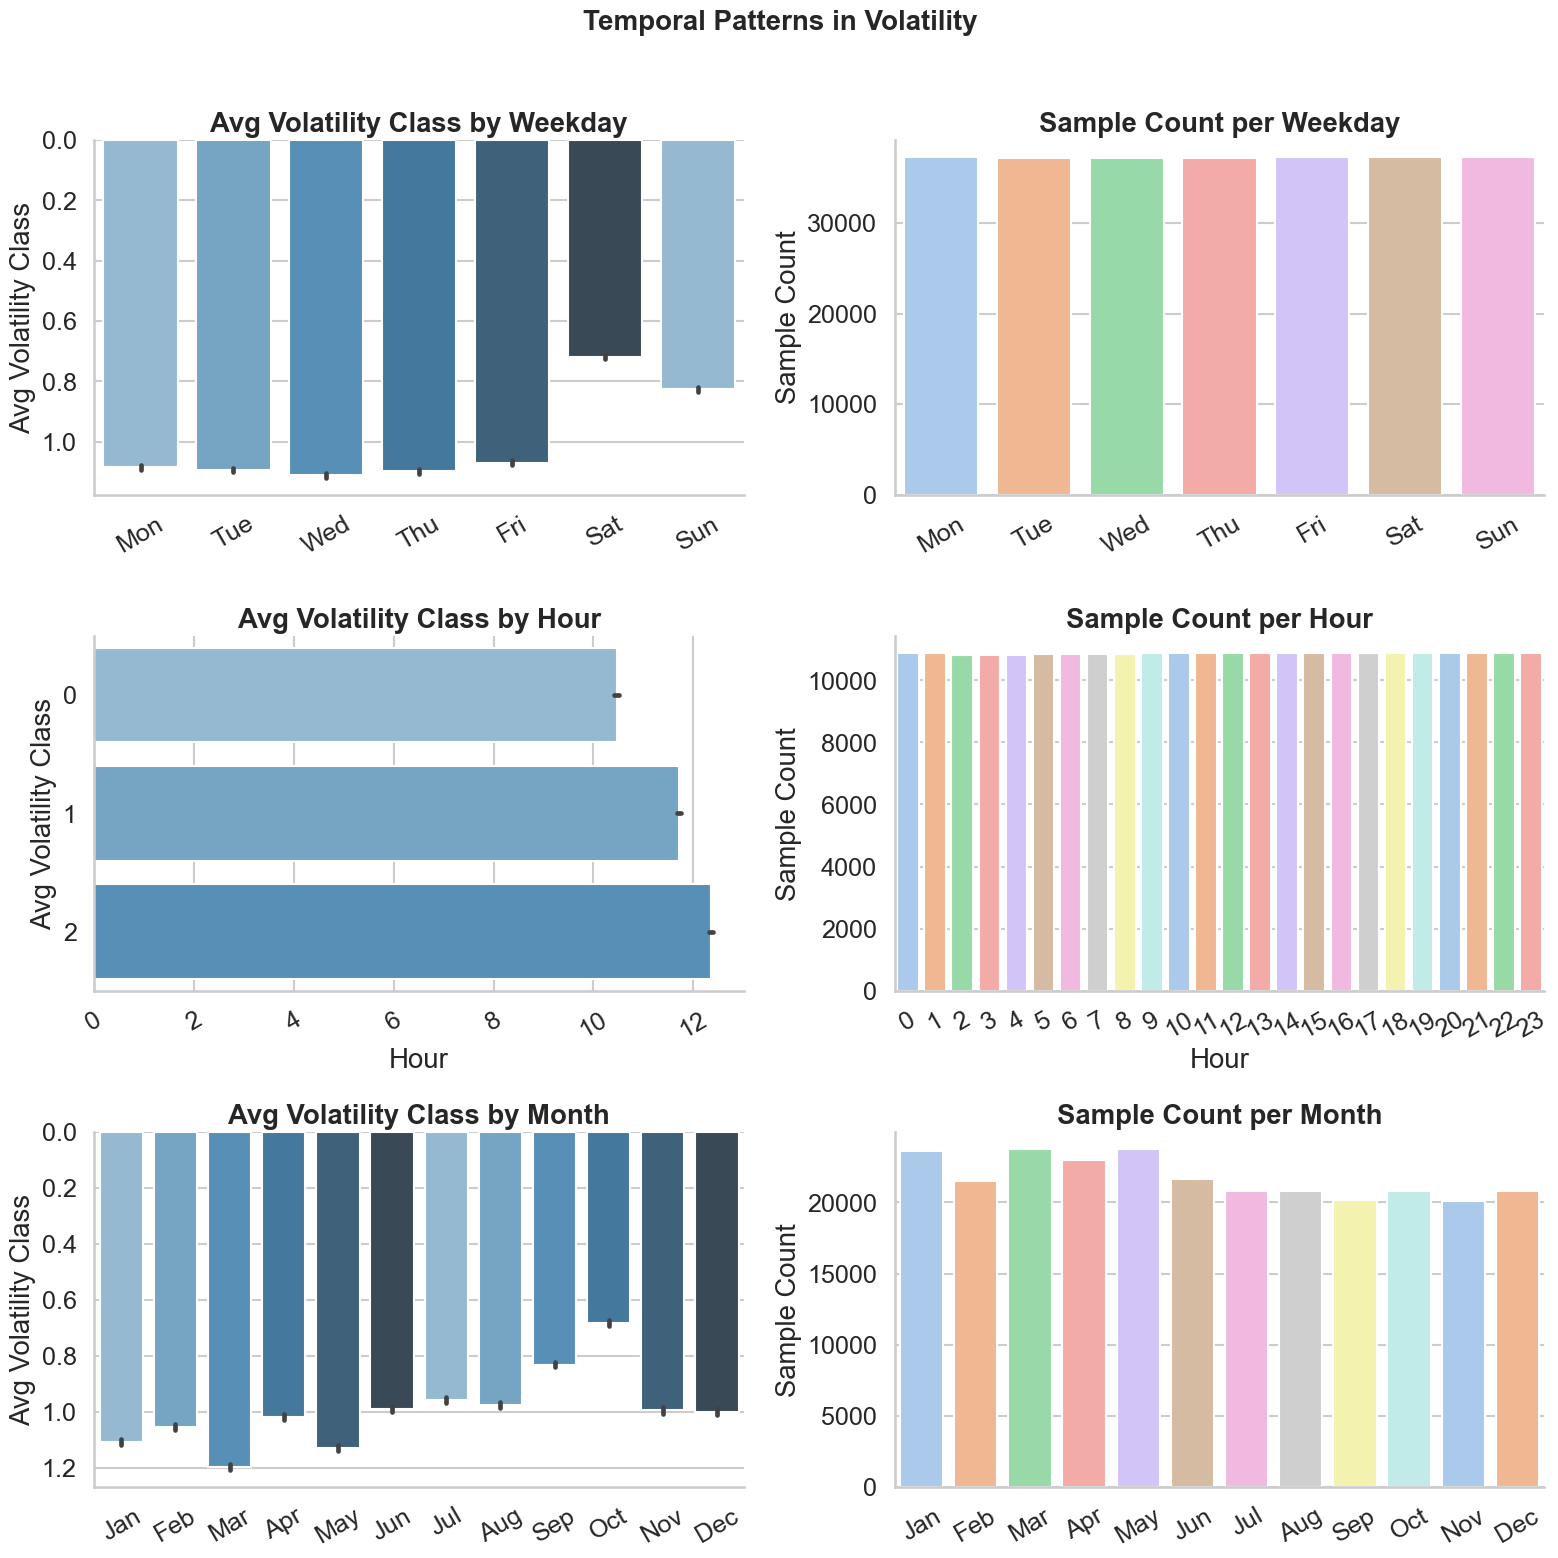

In [2]:
from IPython.display import Image
Image(filename="/Users/rong/Desktop/NS/ai001-p1/graph1.png")


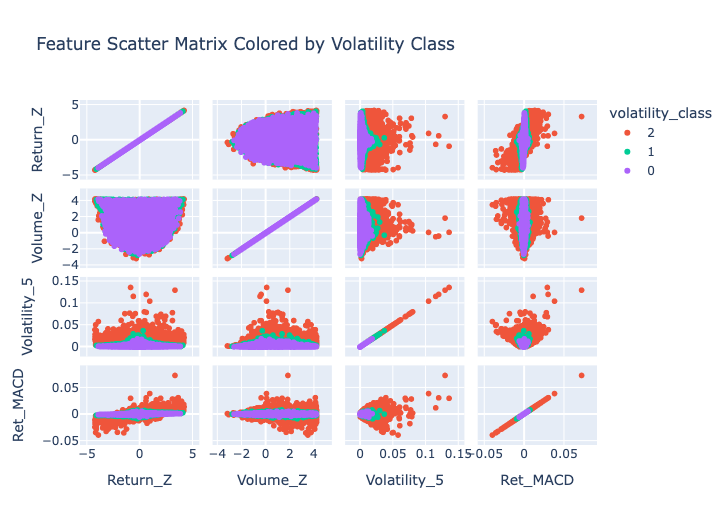

In [3]:
Image(filename="/Users/rong/Desktop/NS/ai001-p1/graph2.png")

# 2. Methodology

## Data Splitting Strategy
- **Training Set:** 76.9% for model training
- **Validation Set:** 11.5% for hyperparameter tuning
- **Test Set:** 11.6% for final evaluation

## Models to Compare
1. **Neural Network** 
2. **Random Forest 1** 
3. **Random Forest 2** 
4. **Transformer** I wanted to try it, but I realized that I probably would get too many bugs for fix in customizing the whole train.py to fit my data, so I give up on this. But at least I made the environment working! 

## Evaluation Metrics
- Accuracy
- Confusion Matrix

In [7]:
#I just pasted from all the other .ipynbs, so please don't run it here.
trn_df = df.iloc[:200000].copy()
val_df = df.iloc[200000:230000]
test_df = df.iloc[230000:]

Training set: (600, 10)
Validation set: (200, 10)
Test set: (200, 10)


# 3. Model Implementation

Let's implement and train multiple models for comparison.

**Random forest 1:**

Mean Absolute Error: 0.3940

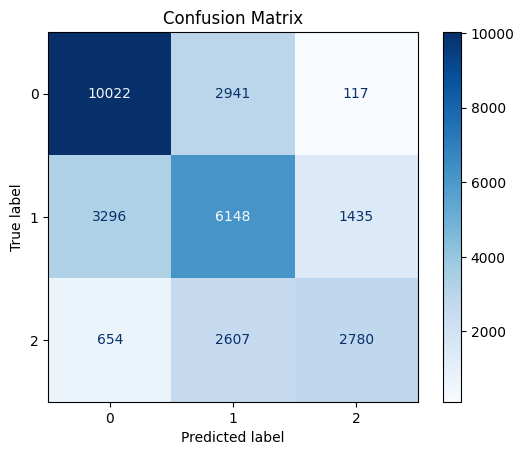

In [5]:
Image(filename="/Users/rong/Desktop/NS/ai001-p1/graph3.png")

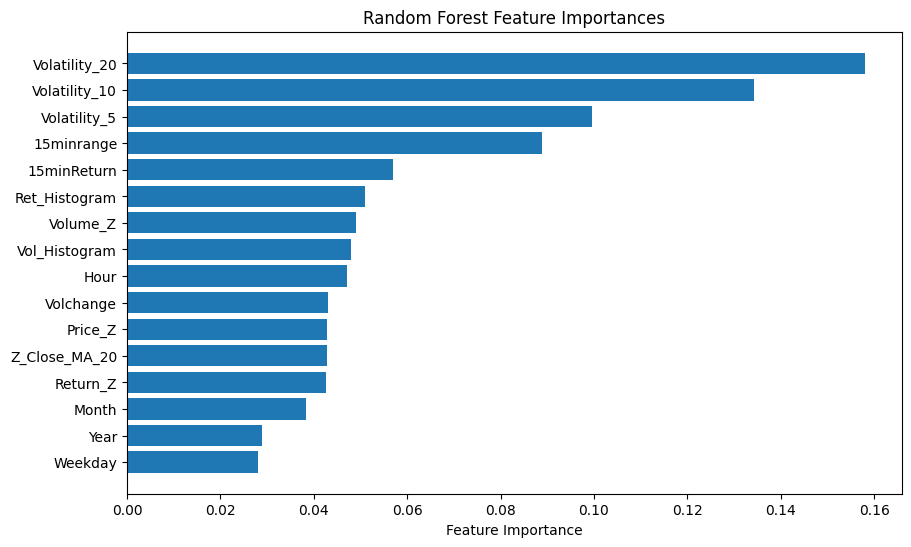

In [4]:
Image(filename="/Users/rong/Desktop/NS/ai001-p1/graph4.png")

**Random Forest 2:**

added more longer volume features

Mean Absolute Error: 0.4028

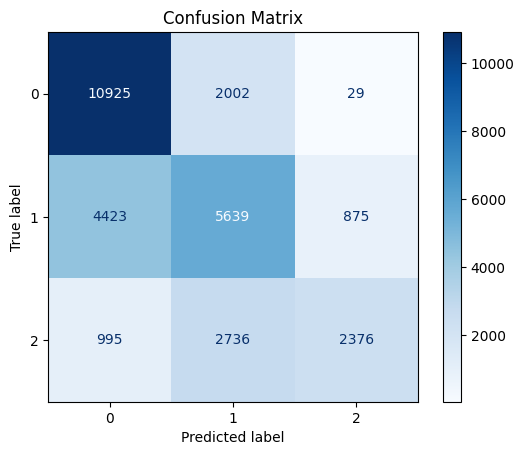

In [6]:
Image(filename="/Users/rong/Desktop/NS/ai001-p1/graph5.png")

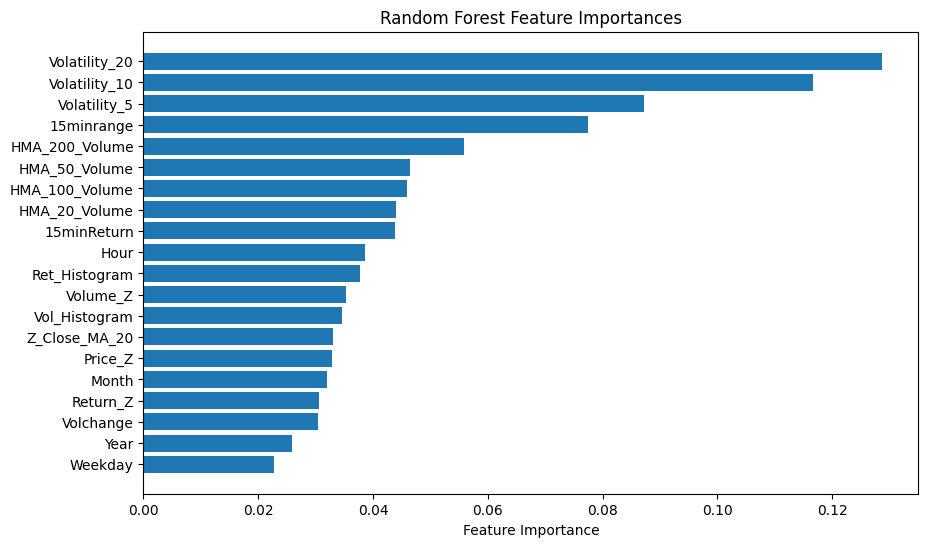

In [7]:
Image(filename="/Users/rong/Desktop/NS/ai001-p1/graph6.png")

**Neural Network**

| **Epoch** | **Train Loss** | **Validation Loss** | **Accuracy** | **Time** |
| :-------: | :------------: | :-----------------: | :----------: | :------: |
|     0     |      0.782     |        0.706        |    67.08%    |   00:24  |
|     1     |      0.766     |        0.683        |    68.70%    |   00:23  |
|     2     |      0.744     |        0.682        |    68.88%    |   00:23  |


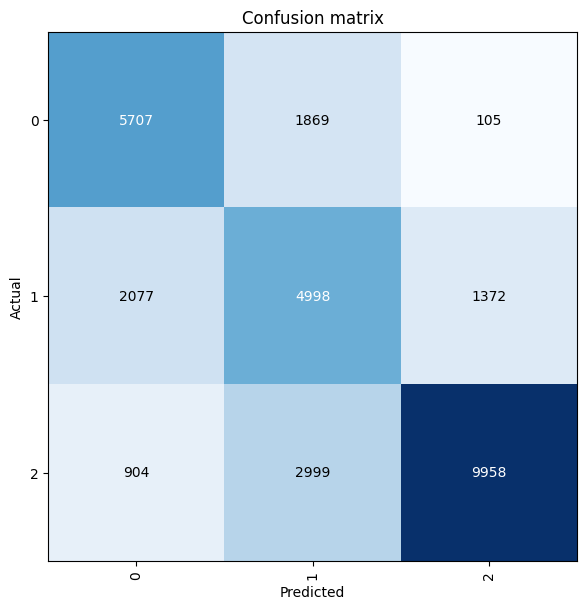

In [8]:
Image(filename="/Users/rong/Desktop/NS/ai001-p1/graph7.png")

# 4. Results and Analysis

Let's analyze and compare the performance of our models.

### Model Evaluation Results (Test Set)

| Model             | Mean Absolute Error (MAE) |
|------------------|---------------------------|
| Random Forest #1 | 0.3968                    |
| Random Forest #2 | 0.4059                    |
| Neural Network   | 0.4960                    |


In [12]:
from IPython.display import display, HTML

display(HTML('''
    <div style="display: flex; justify-content: space-around; align-items: center;">
        <img src="/Users/rong/Desktop/NS/ai001-p1/graph8.png" width="300" style="margin: 10px;">
        <img src="/Users/rong/Desktop/NS/ai001-p1/graph9.png" width="300" style="margin: 10px;">
        <img src="/Users/rong/Desktop/NS/ai001-p1/graph10.png" width="300" style="margin: 10px;">
    </div>
'''))


# 5. AI Tooling Reflection

## AI Tools Used
- **Chatgpt:** code-generating, debugging, terminal, recommendations, brainstorm as well

## Impact on Development
- **Speed:** very fast
- **Learning:** how to make everything work
- **Challenges:** Chatgpt writes a lot of codes with many bugs, and sometimes both of us can't find it

## Code Generated with AI
All sessions. (But honestly it was still not easy lol)

# 6. Conclusions

## Key Findings
- Finding 1 - random forest performed better than neural network
- Finding 2 - The models made few extreme misclassifications, with most errors occurring between neighboring classes, especially in the ambiguous medium volatility category.
- Finding 3 - Longer-term volatility features (Vol_20 > Vol_10 > Vol_5) and recent price range played key roles, highlighting their predictive importance for future volatility.

## Model Performance Summary
- **Best Model:** Random Forest 1 with 63.13% test accuracy
- **Key Factors:** Less noise than Random Forest 2, better categorization than Neural Network

## Limitations
- Limitation 1 - The categorization of volatility into just three classes (Low, Medium, High) may oversimplify the nuanced nature of market behavior.
- Limitation 2 - Neural networks require significant tuning and are more computationally intensive, making them harder to deploy and interpret than tree-based models.
- Limitation 3 - The evaluation was conducted on a fixed split of historical data, which may not fully capture the model’s robustness to unseen or shifting market conditions (which might have already shown in neural network: by changing from best predicting high-vol in the of validation group, to low-vol in test group)

## Future Work
- Improvement 1 - engineer additional features like technical indicators or macroeconomic signals to enrich model input.
- Improvement 2 - I want to (successfully) use a transformer next time
- Improvement 3 - determine interval, future time length (3 hours or other)

## Broader Implications
This work offers practical value for crypto traders and automated systems, helping assess short-term volatility risk. In real-world terms — it aims to answer whether it's safe to take a nap without waking up to a Bitcoin panic.

---
---

In [15]:
import os
print(os.getcwd())


/Users/rong/Desktop/NS/ai001-p1/notebooks
